# K-Means clustering using Pyspark

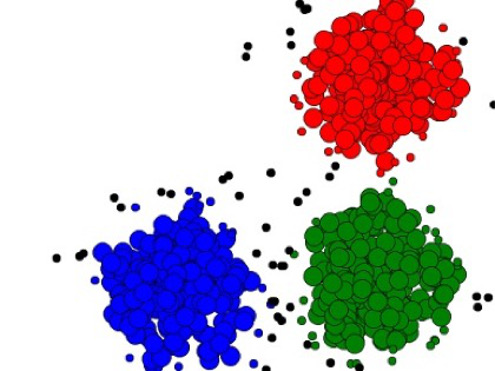

In [1]:
from IPython.display import Image
Image("download.jpg")

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('cluster').getOrCreate()
df = spark.read.csv('seeds_dataset.csv', inferSchema=True, header=True)
df.show(3)

+-----+---------+-----------+-----------------+------------------+---------------------+----------------+
| area|perimeter|compactness| length_of_kernel|   width_of_kernel|asymmetry_coefficient|length_of_groove|
+-----+---------+-----------+-----------------+------------------+---------------------+----------------+
|15.26|    14.84|      0.871|            5.763|             3.312|                2.221|            5.22|
|14.88|    14.57|     0.8811|5.553999999999999|             3.333|                1.018|           4.956|
|14.29|    14.09|      0.905|            5.291|3.3369999999999997|                2.699|           4.825|
+-----+---------+-----------+-----------------+------------------+---------------------+----------------+
only showing top 3 rows



In [2]:
df.printSchema()

root
 |-- area: double (nullable = true)
 |-- perimeter: double (nullable = true)
 |-- compactness: double (nullable = true)
 |-- length_of_kernel: double (nullable = true)
 |-- width_of_kernel: double (nullable = true)
 |-- asymmetry_coefficient: double (nullable = true)
 |-- length_of_groove: double (nullable = true)



In [3]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

assembler = VectorAssembler(inputCols = df.columns, outputCol = 'features')
final_df = assembler.transform(df)
final_df.show(3)

+-----+---------+-----------+-----------------+------------------+---------------------+----------------+--------------------+
| area|perimeter|compactness| length_of_kernel|   width_of_kernel|asymmetry_coefficient|length_of_groove|            features|
+-----+---------+-----------+-----------------+------------------+---------------------+----------------+--------------------+
|15.26|    14.84|      0.871|            5.763|             3.312|                2.221|            5.22|[15.26,14.84,0.87...|
|14.88|    14.57|     0.8811|5.553999999999999|             3.333|                1.018|           4.956|[14.88,14.57,0.88...|
|14.29|    14.09|      0.905|            5.291|3.3369999999999997|                2.699|           4.825|[14.29,14.09,0.90...|
+-----+---------+-----------+-----------------+------------------+---------------------+----------------+--------------------+
only showing top 3 rows



In [4]:
final_df.printSchema()

root
 |-- area: double (nullable = true)
 |-- perimeter: double (nullable = true)
 |-- compactness: double (nullable = true)
 |-- length_of_kernel: double (nullable = true)
 |-- width_of_kernel: double (nullable = true)
 |-- asymmetry_coefficient: double (nullable = true)
 |-- length_of_groove: double (nullable = true)
 |-- features: vector (nullable = true)



In [6]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol = 'features', outputCol = 'scaledFeatures')
scaler_model = scaler.fit(final_df)
final_df = scaler_model.transform(final_df)
final_df.show(3)

+-----+---------+-----------+-----------------+------------------+---------------------+----------------+--------------------+--------------------+
| area|perimeter|compactness| length_of_kernel|   width_of_kernel|asymmetry_coefficient|length_of_groove|            features|      scaledFeatures|
+-----+---------+-----------+-----------------+------------------+---------------------+----------------+--------------------+--------------------+
|15.26|    14.84|      0.871|            5.763|             3.312|                2.221|            5.22|[15.26,14.84,0.87...|[5.24452795332028...|
|14.88|    14.57|     0.8811|5.553999999999999|             3.333|                1.018|           4.956|[14.88,14.57,0.88...|[5.11393027165175...|
|14.29|    14.09|      0.905|            5.291|3.3369999999999997|                2.699|           4.825|[14.29,14.09,0.90...|[4.91116018695588...|
+-----+---------+-----------+-----------------+------------------+---------------------+----------------+-------

In [7]:
final_df.take(1)

[Row(area=15.26, perimeter=14.84, compactness=0.871, length_of_kernel=5.763, width_of_kernel=3.312, asymmetry_coefficient=2.221, length_of_groove=5.22, features=DenseVector([15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22]), scaledFeatures=DenseVector([5.2445, 11.3633, 36.8608, 13.0072, 8.7685, 1.4772, 10.621]))]

In [8]:
kmeans = KMeans(featuresCol = 'scaledFeatures', k=3)
model = kmeans.fit(final_df)

In [9]:
print('WSSSE:', model.computeCost(final_df))

WSSSE: 428.60820118716356


In [11]:
centers = model.clusterCenters()
print(centers)

[array([ 4.07497225, 10.14410142, 35.89816849, 11.80812742,  7.54416916,
        3.15410901, 10.38031464]), array([ 6.35645488, 12.40730852, 37.41990178, 13.93860446,  9.7892399 ,
        2.41585013, 12.29286107]), array([ 4.96198582, 10.97871333, 37.30930808, 12.44647267,  8.62880781,
        1.80061978, 10.41913733])]


In [14]:
model.transform(final_df).select('scaledFeatures', 'prediction').show()

+--------------------+----------+
|      scaledFeatures|prediction|
+--------------------+----------+
|[5.24452795332028...|         2|
|[5.11393027165175...|         2|
|[4.91116018695588...|         2|
|[4.75650503761158...|         2|
|[5.54696468981581...|         2|
|[4.94209121682475...|         2|
|[5.04863143081749...|         2|
|[4.84929812721816...|         2|
|[5.71536696354628...|         1|
|[5.65006812271202...|         2|
|[5.24452795332028...|         2|
|[4.82180387844584...|         2|
|[4.77368894309428...|         2|
|[4.73588435103234...|         2|
|[4.72213722664617...|         2|
|[5.01426361985209...|         2|
|[4.80805675405968...|         2|
|[5.39230954047151...|         2|
|[5.05206821191403...|         2|
|[4.37158555479908...|         0|
+--------------------+----------+
only showing top 20 rows

